In [60]:
##Import the needed libraries
from Bio import SeqIO

import pandas as pd

import numpy as np

import time

from dtaidistance import dtw

from scipy.cluster.hierarchy import average, dendrogram, linkage

import time

##This block of code is where the user inputs the working directory and the input file (JD).
workingDir="C:/Users/jamie/OneDrive/Documents/Biology Projects/Ambarish Kumar Prions/FullTrialRun/"
workingFile="Spike RBD Raw Sequences.fasta"

##Import the records from a fasta file (AK)
records = list(SeqIO.parse(workingDir+workingFile, "fasta"))
##

##Create a Pandas dataframe that can be called by residue, to hold the NoteValue array (JD)
BaseArray=pd.DataFrame.from_dict({
    'NoteValue': [0.3064,15.6497,60.7668,52.1362,76.6645,97.0000,-15.8315,-6.8806,5.5470,-2.3381,-23.9905,40.4569,60.1592,27.1418,42.9375,-22.8297,-11.7423,-17.1576,-33.9918,7.0585]},
orient='index', columns=['G','A','L','M','F','W','K','Q','E','S','P','V','I','C','Y','H','R','N','D','T'])
##

This code took  9.1093  seconds to execute.


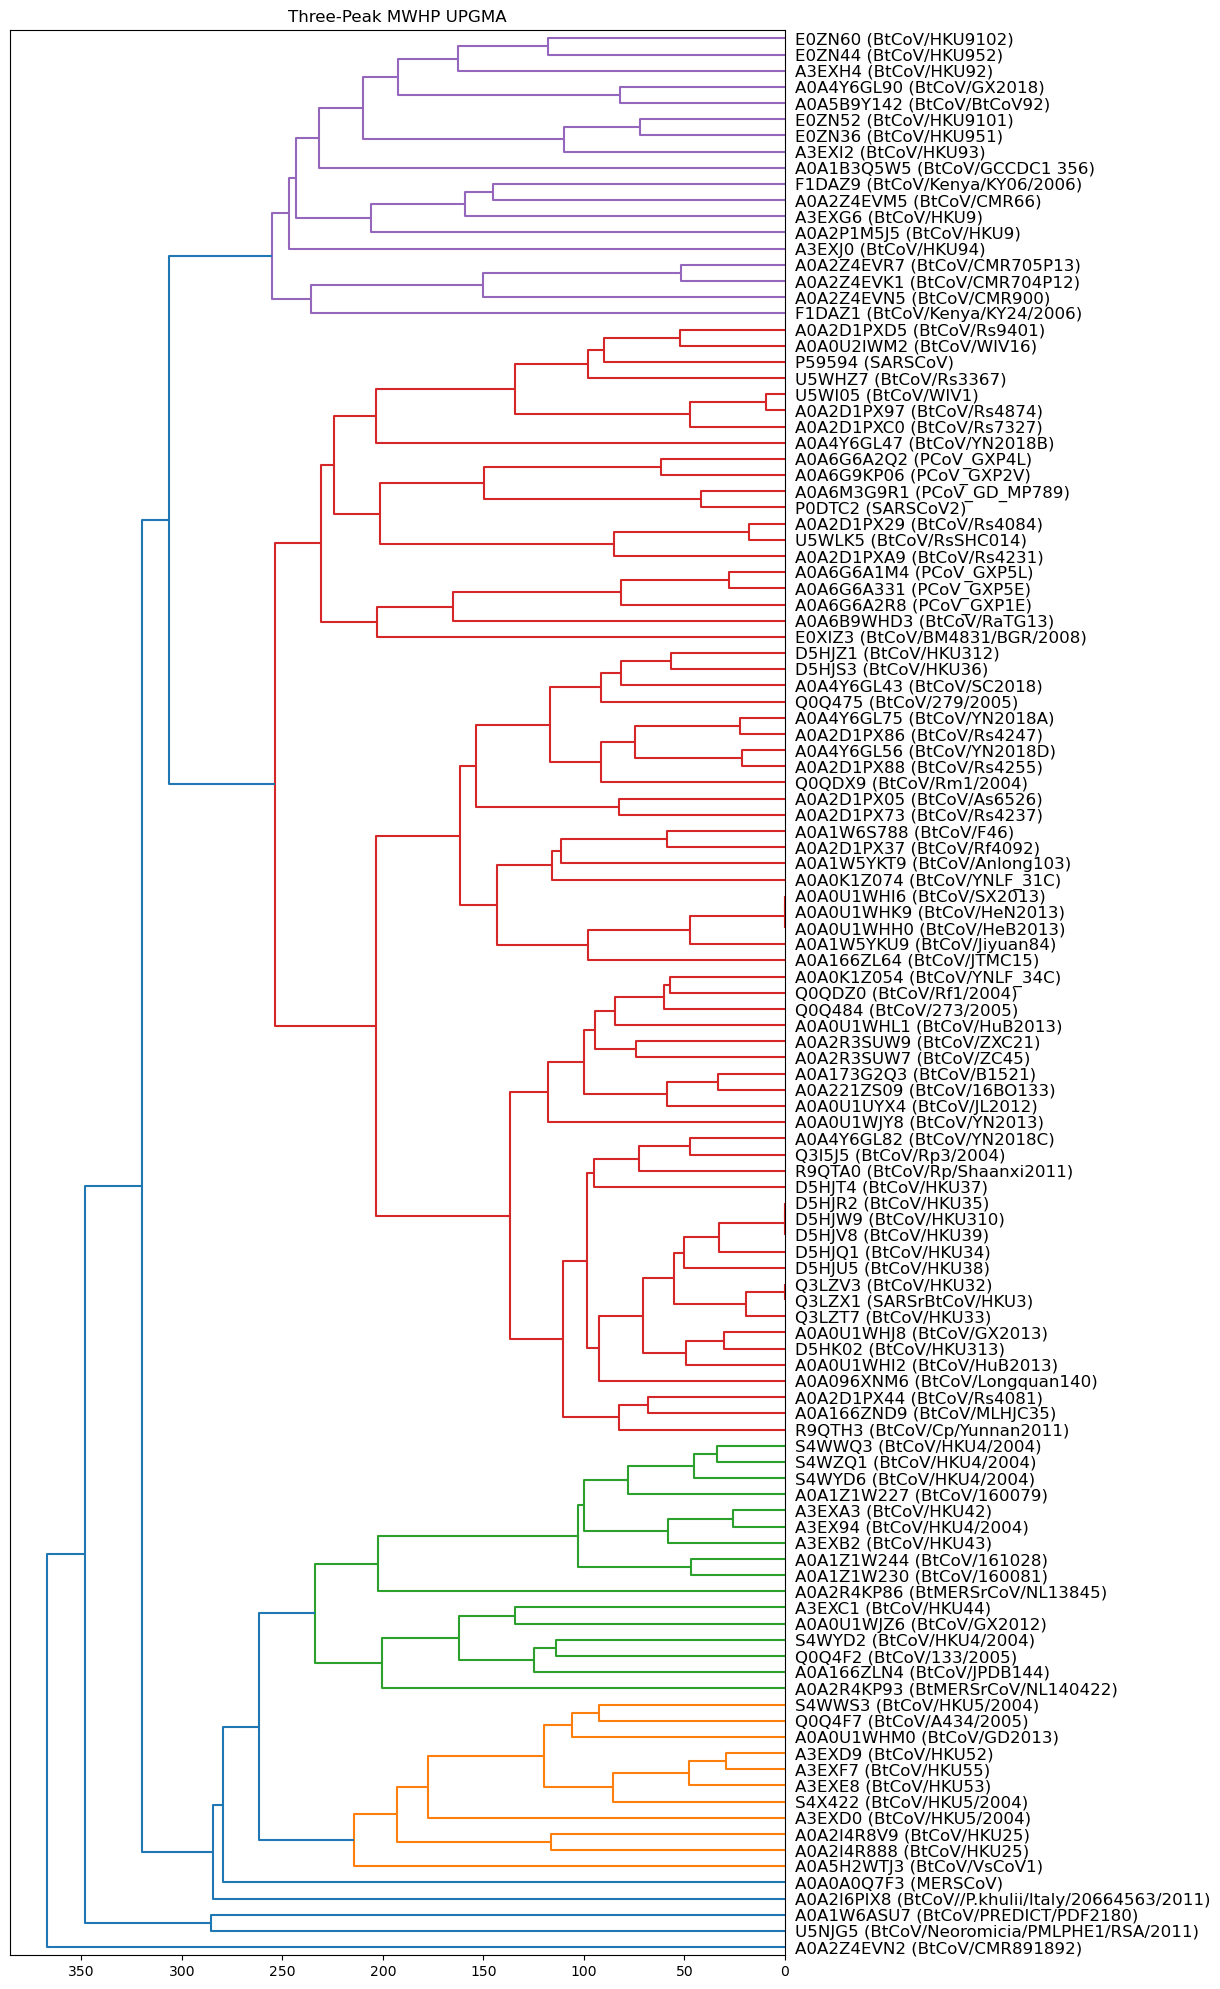

In [61]:
#Set the start time (JD).
StartTime=time.time()

#Create an empty list to hold the vectors produced from each run of the loop (JD).
tempnamesLST=[]
temptpLST=[]
tempspLST=[]

##This initializes an empty dataframe to later hold the converted sequences as vectors (JD).  It creates single peak vectors
##and threepeak vectors but the script only uses the three peak vectors at this time (JD).
VectorsDF=pd.DataFrame(columns=['SeqName', 'ThreePeakVector','SinglePeakVector'])
VectorsDF2=pd.DataFrame(columns=['SeqName', 'ThreePeakVector','SinglePeakVector'])
##

##Assign the variables 'names', 'currentseq' and 'lengther' to each record (AK).Print the records to verify import (AK)

#Loop through all of the protein records in the fasta file converting them to vectors based on molecular weight and hydrophobicity(JD).
for i in range(0,len(records)):
    
    names = records[i].description
    
    #print (names)
    
    currentseq = records[i].seq
    
    #print (records[i].seq)
    
    lengther=len(currentseq)
    
    ##
    
    ##This block of code looks for characters that are not amino acids and if any are found replaces them with a 'G'

    #Convert all of the charaters to upper before converting it to a list (JD)
    currentseq=currentseq.upper()

    #Convert the current sequence to a list (JD)
    currentseq=list(currentseq)

    #Loop through all of the characters and if any are not allowed amino acids, replace them with a 'G'(AK)
    for j in range(lengther):
            strAllowedChars = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L","M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]

            if currentseq[j] not in strAllowedChars: 
                currentseq[j] = currentseq[j].replace(currentseq[j],'G')

    #Convert the list back to a string (JD)
    currentseq=''.join(currentseq)

    ##   
    
    ##This block of code creates a vector containing only the notevalues representing the amino acid sequence (JD).

    NoteVec=[]
    ender=currentseq[-1]
    currentseq="G"+currentseq+ender
    lengther=len(currentseq)

    for k in range(lengther):
        if k==lengther:
            NoteVec.append(BaseArray[currentseq[k-1]].NoteValue)
        else:
            NoteVec.append(BaseArray[currentseq[k]].NoteValue)

    ##   
    
    ##This block of code converts a vector of NoteValues to a three-peak vector (JD)

    lengther2=(len(NoteVec))-1
    ThreePeakOutVector=[]

    for l in range(lengther2):
        if l==0:
            PreOutvalue=NoteVec[l]/2
            Outvalue=((NoteVec[l]*2)+((NoteVec[l]+NoteVec[l+1])/2))/2
            PostOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l+1])/2))/2
            ThreePeakOutVector.append(round(PreOutvalue,4))
            ThreePeakOutVector.append(round(Outvalue,4))
            ThreePeakOutVector.append(round(PostOutvalue,4))
        elif i==lengther:
            PreOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l-1])/2))/2
            Outvalue=((NoteVec[l]*2)+((NoteVec[l]+NoteVec[l-1])/2))/2
            PostOutvalue=NoteVec[i]
            ThreePeakOutVector.append(round(PreOutvalue,4))
            ThreePeakOutVector.append(round(Outvalue,4))
            ThreePeakOutVector.append(round(PostOutvalue,4))
        else:
            PreOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l-1])/2))/2
            Outvalue=((NoteVec[l])+((NoteVec[l]+NoteVec[l+1])/2)+((NoteVec[l]+NoteVec[l-1])/2))/2  
            PostOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l+1])/2))/2
            ThreePeakOutVector.append(round(PreOutvalue,4))
            ThreePeakOutVector.append(round(Outvalue,4))
            ThreePeakOutVector.append(round(PostOutvalue,4))            
    ##
    
    #This extracts the single peak vector from the three peak vector (JD)
    SinglePeakOutVector=ThreePeakOutVector[1::3]
    
    #This populates the VectorsDF with the three and single peak vectors (JD)
    #The append method for dataframes is being deprecated.  It is however ~10X faster than the way I did it below.  At this moment it still works so I am keeping it here.
    # VectorsDF= VectorsDF.append({"SeqName": names, 'ThreePeakVector': np.array(ThreePeakOutVector),'SinglePeakVector': np.array(SinglePeakOutVector)}, ignore_index=True) 
    ##
    
    #Create temporary lists to hold the ThreePeakOutVector and SinglePeakOutVector (JD).
    tempnamesLST.append(names)
    temptpLST.append(np.array(ThreePeakOutVector))
    tempspLST.append(np.array(SinglePeakOutVector))  
    ##
    
##Populate the VectorsDF with the temporary lists containing the sequence names, the ThreePeakVector and the
##SinglePeakVector (JD).
VectorsDF['SeqName']=tempnamesLST
VectorsDF['ThreePeakVector']=temptpLST
VectorsDF['SinglePeakVector']=tempspLST
 
##Calculate the pairwise distance between all pairs of sequences in the input file (JD).
#Convert the vectors stored in VectorsDF to a list to use to calculate a distance matrix (JD).
ThreePeakVectorsList=VectorsDF["ThreePeakVector"].values.tolist()

#Calculate the pairwise distance matrix (JD).
distanceMatrix = dtw.distance_matrix_fast(ThreePeakVectorsList,compact=True)
##
    
##The folowing block of code performs UPGMA HCA on a distance matrix, builds the resulting dendrogram and exports 
##the dendrogram as a .png (JD).

#Get the current datetime to use in file names (JD)
timestamp=str(time.time())

#Extract the names for VectorsDF so they can be used in the dendrogram (JD).
SequenceNames=VectorsDF["SeqName"].values.tolist()

#Perform UPGMA hierarchical cluster
outDND=average(distanceMatrix)

#Plot the UPGMA dendrogram
import matplotlib.pyplot as plt
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(25)
plt.title("Three-Peak MWHP UPGMA")
dendro1=dendrogram(outDND,labels=SequenceNames,leaf_font_size=12,orientation='left')

##This block of code saves the dendrogram produced above as a .png file
plt.savefig(workingDir+timestamp+"DendrogramOutput.png",bbox_inches='tight')

##This block of code converts the linkage matrix outDND (a dendrogram) to newick format (JD).
##This code is set to be incorporated in scipy in the near future and was found at 
## https://github.com/scipy/scipy/issues/8274 (JD).
from scipy.cluster import hierarchy
def getNewick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick

tree = hierarchy.to_tree(outDND,False)
newickOutput=getNewick(tree, "", tree.dist, SequenceNames)
##

##This block of code is used to save the dendrogram created above in newick format (JD).

with open(workingDir+timestamp+'NewickOutput.nwk', 'w') as f:
    f.write(newickOutput)
##

#Set the end time (JD)
EndTime=time.time()

#Calculate the execution time of the code between StartTime and EndTime (JD).
CodeExecutionTime=EndTime-StartTime
print('This code took ',round(CodeExecutionTime,4), ' seconds to execute.' )